<a href="https://colab.research.google.com/github/shriyan44/lab-3-phase-2-shriyan44/blob/main/Copy_of_DATA_301_Lab_3_Shriya_Nimmagadda_and_Ricky_Chavez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [ ]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/"
df_data = pd.read_csv(data_dir + "data.csv")
df_data.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

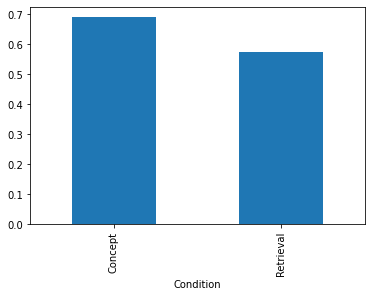

In [ ]:
df_data.groupby("Condition")["PR.2"].mean().plot.bar()

By plotting the average predictions for Condition we can see that Concept map subjects predicted that they would learn more than retrieval subjects.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

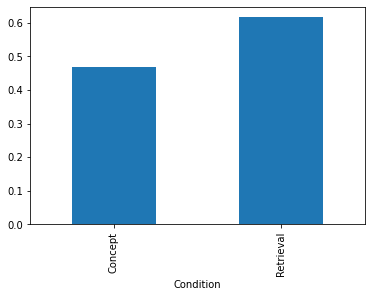

In [ ]:
df_data.groupby("Condition")["TS.avg"].mean().plot.bar()

I chose to use the Test Score Average to compare. I didn't want to compare the Retireval and Concept scores because they are different tests so they may different points/ scored differently so it seems like the Test Score Average will have taken the difference into account so we can compare them fairly.

Based on the graph we can see that on average, the Retireval subjects actually scored better than the Ceoncept ones. They scored .6 on average while Concept subjects avg score was .45

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


10     15.000000
11     31.666667
12     11.111111
13     37.142857
14     13.333333
15     50.000000
16     11.428571
17     82.500000
18      3.333333
32     53.750000
33     11.111111
34     45.000000
37     57.500000
38     13.333333
39    110.000000
40     40.000000
42     36.000000
Name: Approx. Error Retrival Pred., dtype: float64
0      51.250000
1      40.000000
2      88.571429
3      38.571429
4      71.578947
5      28.333333
6      38.333333
7      10.000000
8       1.666667
9      24.444444
19     27.500000
20     68.333333
21     24.444444
22     41.111111
23      1.666667
24     57.142857
25     25.714286
26     14.000000
27     33.333333
28    100.000000
29     63.333333
30     28.571429
31      8.571429
35     71.428571
36     30.000000
41     58.000000
Name: Approx. Error Concept Pred., dtype: float64


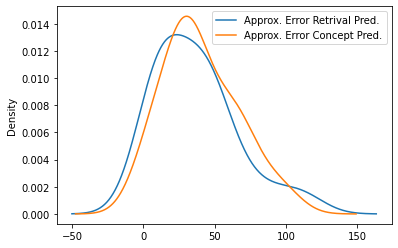

In [4]:
df_conc = df_data.loc[(df_data["Condition"] == "Concept")]
df_ret = df_data.loc[(df_data["Condition"] == "Retrieval")]


df_ret["Approx. Error Retrival Pred."] = abs( (df_ret["TS.avg"] -  df_ret["PR.2"]) / df_ret["PR.2"]) * 100
df_ret["Approx. Error Retrival Pred."].plot.density(legend=True)

df_conc["Approx. Error Concept Pred."] = abs((df_conc["TS.avg"] - df_conc["PR.2"]) / df_conc["PR.2"] ) * 100
df_conc["Approx. Error Concept Pred."].plot.density(legend=True)

print(df_ret["Approx. Error Retrival Pred."])
print(df_conc["Approx. Error Concept Pred."])

We plotted a density plot to compare the Approximate Error for the predicted test score and actual average test scores of the follow up test for Retrieval and Concept map subjects. This plot shows us the aproximate difference of predictions and test scores as percent differences so we can see that the Retrieval subjects were better at prediciting because the curve overall was smaller than the Concept subject curve. The Concept subjects peak was a bit higher at 45% differences of scores.


## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.